<a href="https://colab.research.google.com/github/juanfernandezgracia/xarxa_fonologia_llengues/blob/master/xarxes_llengues_Pablo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phonological language network

We have a dataset with 481 languages and phonological characteristics of them. Let's take a look at it.

In [2]:
!pip install infomap

In [3]:
# necessary modules and defined functions
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import random
from infomap import Infomap
from collections import defaultdict
from networkx.algorithms import bipartite
# Function to generate a random color
def random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))
# %%
def plot_bipartite_network_horizontal(G,path_fout):
    plt.figure(figsize=(60, 18))
    plt.box(False)
    top_nodes, bottom_nodes = bipartite.sets(G)
    pos = nx.bipartite_layout(G, top_nodes)
    weights = np.array([0.5*G.edges[edge]['weight']
                            for edge in G.edges()])
    strength_dict = dict(G.degree(G.nodes(),
                                    weight='weight'))
    sorted_top_nodes = sorted(top_nodes,
                            key=lambda x: strength_dict[x],
                            reverse=True)
    sorted_bottom_nodes = sorted(bottom_nodes,
                                key=lambda x: strength_dict[x],
                                reverse=True)
    all_sorted_nodes = sorted_top_nodes + sorted_bottom_nodes
    G_sorted = nx.Graph()
    G_sorted.add_nodes_from(all_sorted_nodes)
    G_sorted.add_edges_from(G.edges(data=True))
    pos = dict()
    # Place top nodes at x=0
    for i, node in enumerate(sorted_top_nodes):
        pos[node] = (1-float((len(top_nodes)-1)-i)/(len(top_nodes)-1), 1)
    # Place bottom nodes at x=1
    for i, node in enumerate(sorted_bottom_nodes):
        pos[node] = (1-float((len(bottom_nodes)-1)-i)/(len(bottom_nodes)-1), 0)
    sizes = [75*strength_dict[x] for x in G_sorted.nodes()]
    nx.draw_networkx_nodes(G_sorted,
                        pos,
                        node_color=['peachpuff' if n in top_nodes
                                    else 'orchid' for n in G.nodes()],
                        node_size=sizes)
    # print(weights_CC_M)
    # Draw edges sorted by weight so that higher weighted edges appear on top
    for u, v, d in sorted(G.edges(data=True), key=lambda x: x[2]['weight']):
        # print(d)
        nx.draw_networkx_edges(G,
                            pos,
                            edgelist=[(u, v)],
                            width=d['weight'],
                            #    edge_cmap=mpl.colormaps['jet'],
                            edge_color=mpl.colormaps['viridis'](float(d['weight'])/max(weights)),
                            alpha=0.7)

    # Draw node labels
    text = nx.draw_networkx_labels(G,
                            pos,
                            labels=dict(zip(top_nodes,top_nodes)),
                            font_size=10,
                            font_weight='bold')
    for _, t in text.items():
        t.set_rotation(45)
    text = nx.draw_networkx_labels(G,
                            pos,
                            labels=dict(zip(bottom_nodes,bottom_nodes)),
                            font_size=50)
    plt.savefig(path_fout, bbox_inches='tight')


In [5]:
# load dataframe
lang_df = pd.read_excel('fonologia transposat_complet_MDPN.xlsx',index_col=None)
lang_df = lang_df.set_index('Language').T
lang_df.head()

Language Voicing and Gaps in Plosive Systems  \
Abipón                                     1   
Abkhaz                                     2   
Aché                                       1   
Acoma                                      1   
Aghem                                      4   

Language Voicing in Plosives and Fricatives Uvular Consonants  \
Abipón                                    1                 3   
Abkhaz                                    4                 2   
Aché                                      1                 1   
Acoma                                     1                 1   
Aghem                                     4                 1   

Language Presence of Uncommon Consonants Lateral Consonants  \
Abipón                                 1                  1   
Abkhaz                                 4                  1   
Aché                                   1                  2   
Acoma                                  2                  5   
Aghem                                  3                  1   

Language Glottalized Consonants Consonant Inventories\n  \
Abipón                        1                       2   
Abkhaz                        3                       5   
Aché                          1                       1   
Acoma                         2                       5   
Aghem                         1                       3   

Language  Vowel Quality Inventories Front Rounded Vowels Syllable Structure  \
Abipón                            2                    1                  3   
Abkhaz                            1                    1                  3   
Aché                              2                    1                  1   
Acoma                             2                    1                  2   
Aghem                             3                    1                  2   

Language              Família               Gènere  
Abipón             Guaicuruan               Abipon  
Abkhaz    Northwest Caucasian  Northwest Caucasian  
Aché           Maweti-Guarani               Tupian  
Acoma                 Keresan              Keresan  
Aghem             Niger-Congo     Wide Grassfields

In [6]:
lang_df.describe()

Language  Voicing and Gaps in Plosive Systems  \
count                                     481   
unique                                      5   
top                                         2   
freq                                      216   

Language  Voicing in Plosives and Fricatives  Uvular Consonants  \
count                                    481                481   
unique                                     4                  4   
top                                        2                  1   
freq                                     156                400   

Language  Presence of Uncommon Consonants  Lateral Consonants  \
count                                 481                 481   
unique                                  6                   5   
top                                     1                   1   
freq                                  375                 336   

Language  Glottalized Consonants  Consonant Inventories\n  \
count                        481                      481   
unique                         8                        5   
top                            1                        3   
freq                         349                      177   

Language   Vowel Quality Inventories  Front Rounded Vowels  \
count                            481                   481   
unique                             3                     4   
top                                2                     1   
freq                             244                   447   

Language  Syllable Structure      Família   Gènere  
count                    481          481      481  
unique                     3          152      320  
top                        2  Niger-Congo  Oceanic  
freq                     273           49       16

In [7]:
# get rid of familia and genere to work only with phonological characteristics
lang_df_nofam = lang_df.drop(columns=['Família', 'Gènere'])
lang_df_nofam = lang_df_nofam.astype(float)
lang_df_nofam.describe()

Language  Voicing and Gaps in Plosive Systems  \
count                              481.000000   
mean                                 1.873181   
std                                  1.083267   
min                                  1.000000   
25%                                  1.000000   
50%                                  2.000000   
75%                                  2.000000   
max                                  5.000000   

Language  Voicing in Plosives and Fricatives  Uvular Consonants  \
count                             481.000000         481.000000   
mean                                2.324324           1.295218   
std                                 1.200178           0.707223   
min                                 1.000000           1.000000   
25%                                 1.000000           1.000000   
50%                                 2.000000           1.000000   
75%                                 4.000000           1.000000   
max                                 4.000000           4.000000   

Language  Presence of Uncommon Consonants  Lateral Consonants  \
count                          481.000000          481.000000   
mean                             1.455301            1.869023   
std                              0.978188            1.485169   
min                              1.000000            1.000000   
25%                              1.000000            1.000000   
50%                              1.000000            1.000000   
75%                              1.000000            2.000000   
max                              7.000000            5.000000   

Language  Glottalized Consonants  Consonant Inventories\n  \
count                 481.000000               481.000000   
mean                    1.746362                 2.841996   
std                     1.392731                 1.186725   
min                     1.000000                 1.000000   
25%                     1.000000                 2.000000   
50%                     1.000000                 3.000000   
75%                     2.000000                 4.000000   
max                     8.000000                 5.000000   

Language   Vowel Quality Inventories  Front Rounded Vowels  Syllable Structure  
count                     481.000000            481.000000          481.000000  
mean                        2.180873              1.110187            2.182952  
std                         0.678945              0.449908            0.632291  
min                         1.000000              1.000000            1.000000  
25%                         2.000000              1.000000            2.000000  
50%                         2.000000              1.000000            2.000000  
75%                         3.000000              1.000000            3.000000  
max                         3.000000              4.000000            3.000000

In [8]:
# correlations
corr_mat = lang_df_nofam.T.corr('pearson')
print(corr_mat)

                     Abipón    Abkhaz      Aché     Acoma     Aghem     Ahtna  \
Abipón             1.000000  0.036860 -0.062500 -0.017010 -0.189484  0.335410   
Abkhaz             0.036860  1.000000 -0.589768  0.190611  0.447007  0.263752   
Aché              -0.062500 -0.589768  1.000000  0.442269 -0.126323  0.223607   
Acoma             -0.017010  0.190611  0.442269  1.000000 -0.148983  0.669439   
Aghem             -0.189484  0.447007 -0.126323 -0.148983  1.000000 -0.263635   
...                     ...       ...       ...       ...       ...       ...   
Yupik (Siberian)   0.487450  0.629724 -0.371391  0.214794  0.203299  0.581318   
Yurok              0.311294  0.254203  0.287348  0.860268 -0.137128  0.728200   
Zoque (Copainalá)  0.678401  0.177822  0.075378  0.225668  0.101567  0.269680   
Zulu              -0.353153  0.634753 -0.067267  0.439388  0.050984  0.270746   
Zuni               0.028677  0.101477  0.401478  0.811708 -0.328445  0.718185   

                         Ai

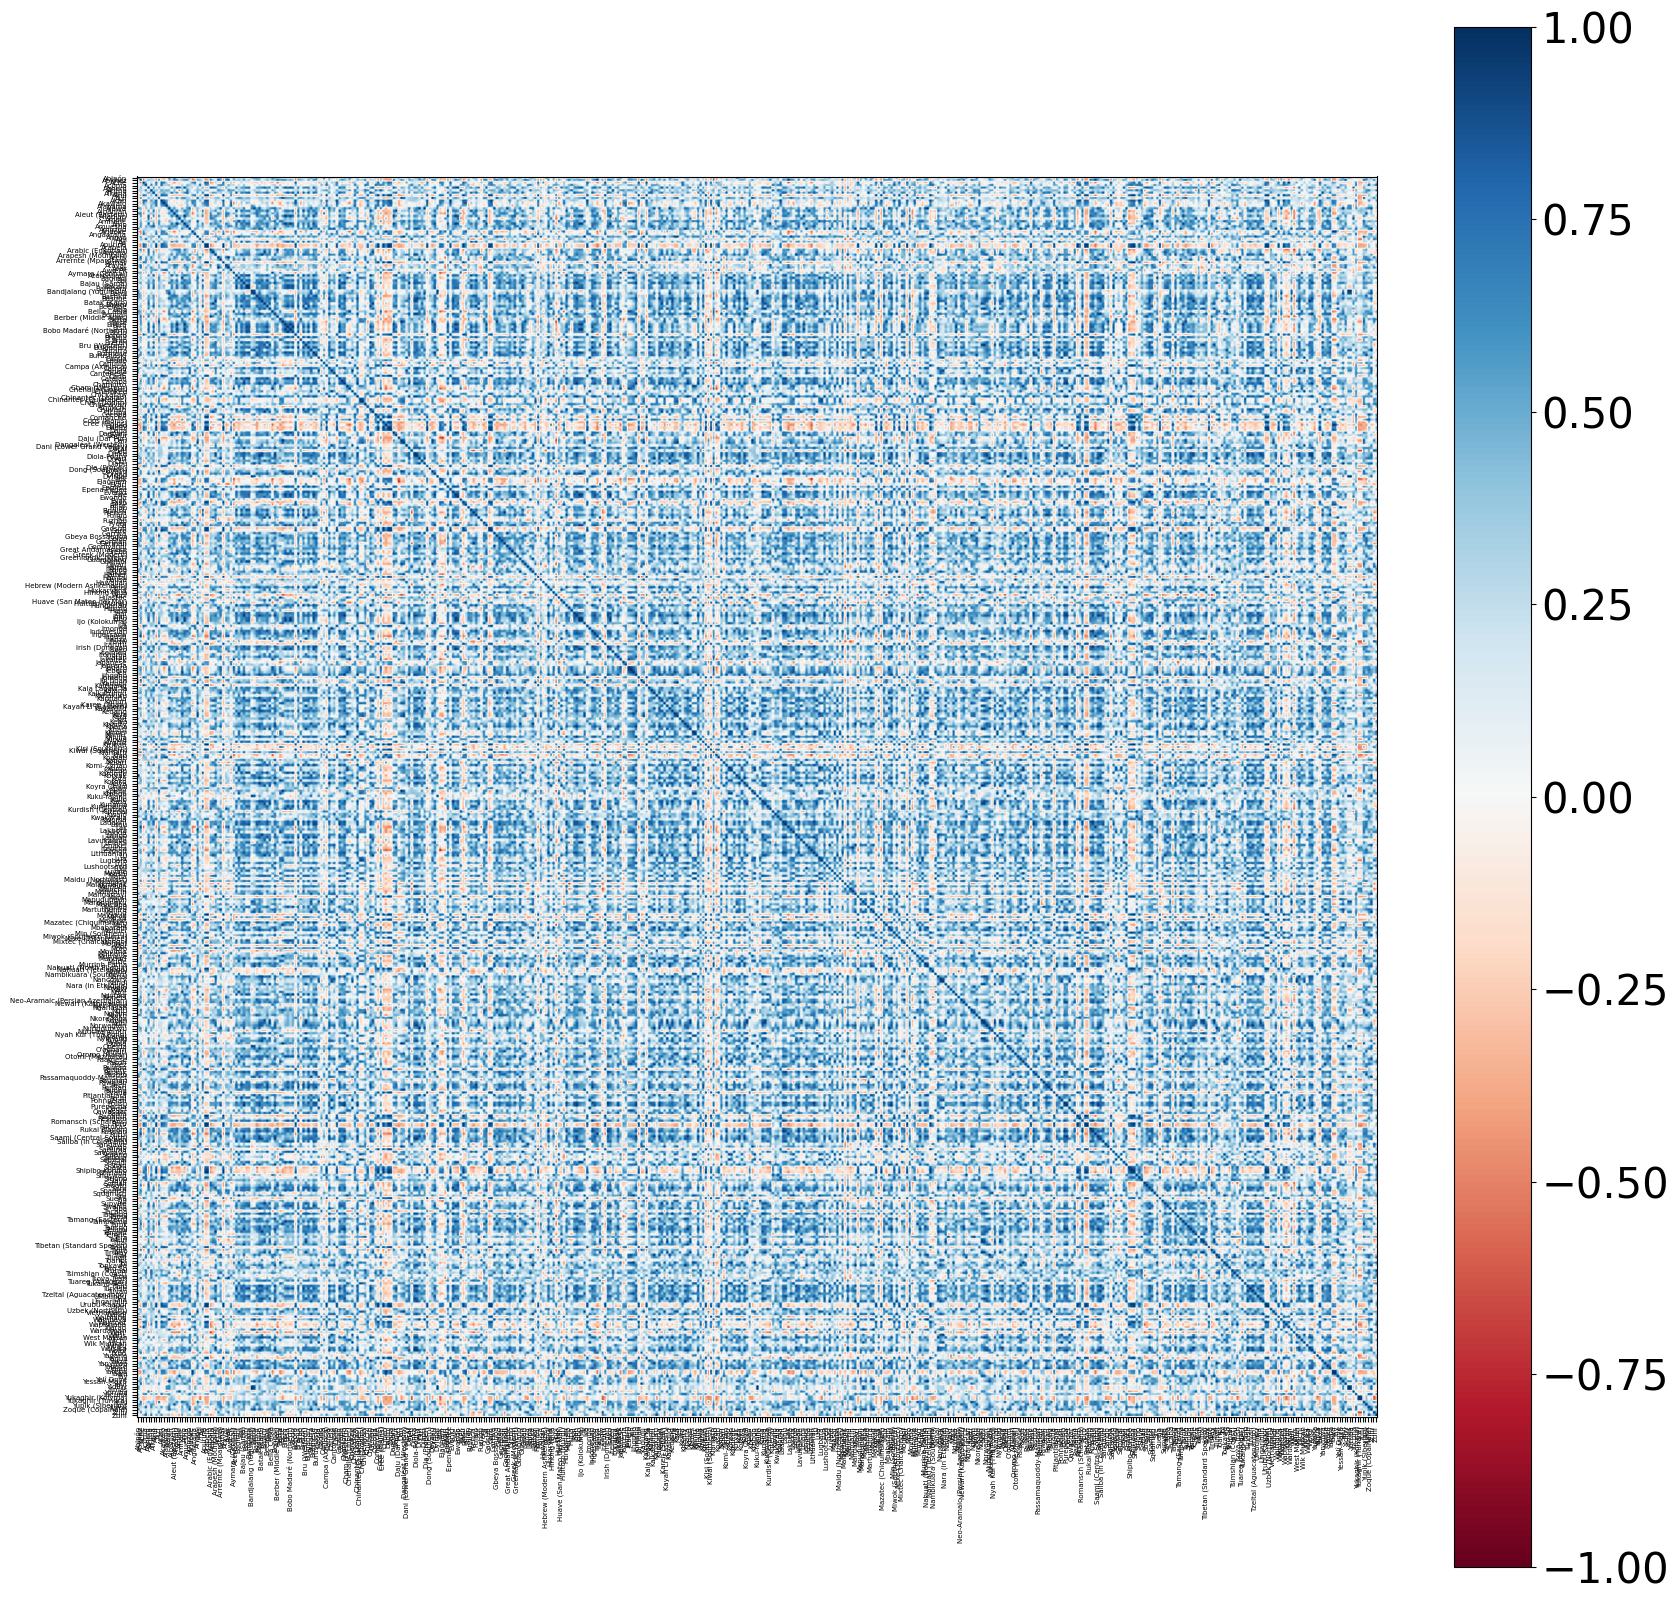

In [10]:
# Plot correlation matrix with no particular order
langs = list(corr_mat.index)
plt.figure(figsize=(20,20))
plt.imshow(corr_mat,cmap='RdBu',vmin=-1,vmax=1)
plt.xticks(ticks=range(len(langs)), labels=langs,rotation=90,fontsize=5)
plt.yticks(ticks=range(len(langs)), labels=langs,fontsize=5)
colorbar = plt.colorbar()
colorbar.ax.tick_params(labelsize=30)


(-1.0, 1.0)

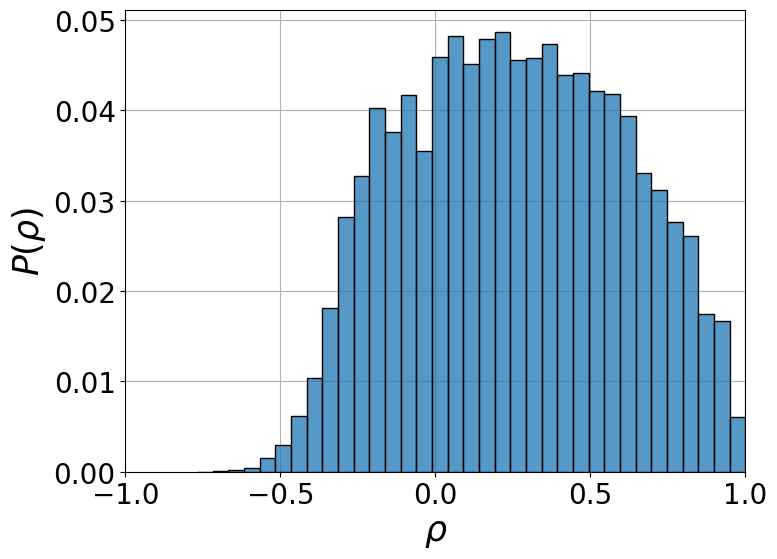

In [11]:
# weight distribution
plt.figure(figsize=(8,6))
correlation_values = corr_mat.values.flatten()
correlation_values = correlation_values[correlation_values != 1]
plt.grid(zorder=0)
sns.histplot(correlation_values, kde=False, binwidth=0.05, stat='probability',zorder=10)
plt.ylabel('$P(\\rho)$', fontsize = 25)
plt.xlabel('$\\rho$', fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(np.linspace(-1,1,5),fontsize=20)
plt.xlim(-1,1)


## Percolation study

Next we perform a percolation study to decide which value of the correlation use as a threshold for getting a network. To do so we will first order all pairs of languages in decreasing order of their correlations. Then we will add links between the pairs in that order and we will keep track of the largest connected component and osf the second one as a proxy for the susceptibility.

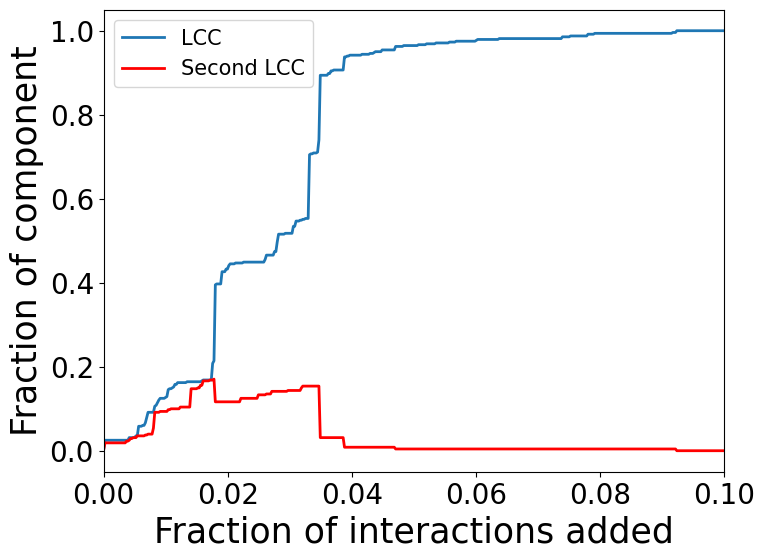

In [12]:
# Sort correlations in decreasing order, excluding self-correlations
correlation_pairs = []
for i, language1 in enumerate(lang_df.index):
    for j, language2 in enumerate(lang_df.index):
        if i != j:
            correlation_pairs.append((language1, language2, corr_mat[language1][language2]))

sorted_correlation_pairs = sorted(correlation_pairs, key=lambda x: x[2], reverse=True)

# Step 3: Create network in NetworkX with all languages and no interactions
G = nx.Graph()
languages = lang_df.index
N = len(languages)
G.add_nodes_from(languages)
# Initialize variables for measurement
measurement_interval = 50
sizes_lcc = []
sizes_second_largest = []
correlation_thresholds = []

# Step 4: Iterate through sorted correlations, adding interactions and measuring sizes
for idx, pair in enumerate(sorted_correlation_pairs):
    language1, language2, correlation = pair
    if idx % measurement_interval == 0:
        # Measure the network properties
        lcc_size = len(max(nx.connected_components(G), key=len))
        sizes_lcc.append(lcc_size/N)

        sorted_cc = sorted(nx.connected_components(G), key=len, reverse=True)
        second_largest_size = len(sorted_cc[1]) if len(sorted_cc) > 1 else 0
        sizes_second_largest.append(second_largest_size/N)
        correlation_thresholds.append(correlation)
    if correlation < 0.5:
        break  # Stop adding pairs if correlation falls below 0.5
    G.add_edge(language1, language2)

# Step 5: Plot results
x = np.array(range(0, len(sizes_lcc) * measurement_interval, measurement_interval))/(N*(N-2))
plt.figure(figsize=(8,6))
plt.plot(x, sizes_lcc, label='LCC',lw=2)
plt.plot(x, sizes_second_largest, label='Second LCC', lw=2, c='r')
plt.xlabel('Fraction of interactions added', fontsize=25)
plt.ylabel('Fraction of component', fontsize=25)
plt.xlim(0,0.1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=15)


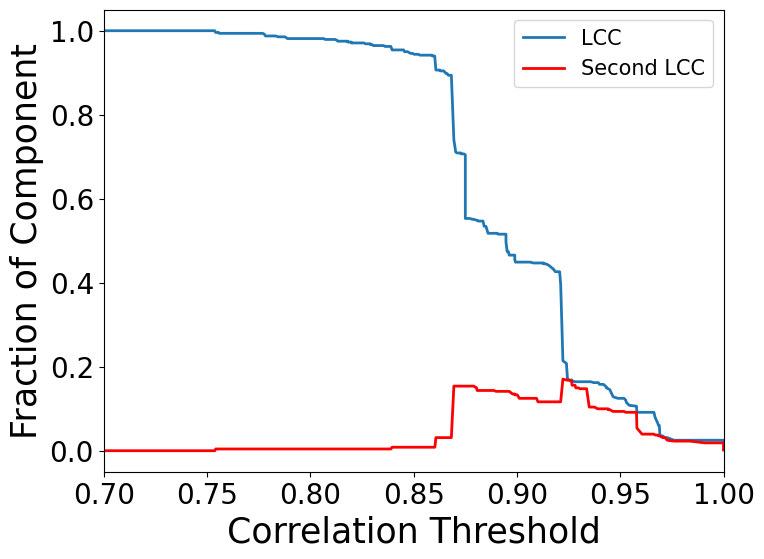

In [13]:
# Now the same plot but as a function of the threshold
plt.figure(figsize=(8,6))
plt.plot(correlation_thresholds, sizes_lcc, label='LCC', lw=2)
plt.plot(correlation_thresholds, sizes_second_largest, label='Second LCC', lw=2, c='r')
plt.xlabel('Correlation Threshold', fontsize=25)
plt.ylabel('Fraction of Component', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0.7,1.0)
plt.legend(fontsize=15)


We choose a threshold $\rho_{th}=0.75$, as i corresponds to the less dense network that is composed only by one component.

In [14]:
# %% create network with rho_th=0.75
thres = 0.75
G_lang = nx.Graph()
for index, row in corr_mat.iterrows():
    for lang in langs:
        if lang != index:
            if np.abs(row[lang]) > thres:
                G_lang.add_edge(index, lang, weight=row[lang])
# adding familia and genere as attributes of the network
family_dict = dict(zip(langs,list(lang_df['Família'])))
nx.set_node_attributes(G_lang,family_dict,'Familia')
family_dict = dict(zip(langs,list(lang_df['Gènere'])))
nx.set_node_attributes(G_lang,family_dict,'Genere')

In [15]:
# getting communities with infomap
from infomap import Infomap
im = Infomap()
mapping = im.add_networkx_graph(G_lang)
im.run()

In [17]:
# create communities dictionary and add it as a node attribute
communities_dict = {}
for node in im.tree:
    if node.is_leaf:
        communities_dict[im.names[node.node_id]] = node.module_id
N_comm = np.max(list(communities_dict.values()))
communities_im = N_comm*[[]]
for i in range(N_comm):
    communities_im[i] = [node for node in communities_dict.keys() if communities_dict[node]==i+1]
nx.set_node_attributes(G_lang,communities_dict,'Community')

#modularity
modularity = nx.algorithms.community.quality.modularity(G_lang, communities_im)

print(f"Modularity: {modularity}")

Modularity: 0.524619429198895


In [ ]:
# %% save network to plot with cytoscape
nx.write_gml(G_lang,'../results/lang_network_075.gml')

In [ ]:
# layout and weights for network plotting also familias and colors
weights = np.array([G_lang.edges[edge]['weight'] for edge in G_lang.edges()])
layout = nx.fruchterman_reingold_layout(G_lang)
familias = set(family_dict.values())
color_dict = {familia: random_color() for familia in familias}

In [ ]:
# plot network with communities
plt.figure(figsize=(20,20))
nx.draw(G_lang,
        pos=layout,
        edge_color=weights,
        width=np.array(weights),
        with_labels=True,
        node_color=[communities_dict[node] for node in G_lang.nodes()],
        edge_cmap=plt.cm.Reds,
        cmap=plt.cm.Accent)

plt.box(False)
plt.savefig('../results/figures/red_lang_075_comunidades.png',bbox_inches='tight')

In [ ]:
# plot network with families
plt.figure(figsize=(20,20))
nx.draw(G_lang,
        pos=layout,
        edge_color=weights,
        width=np.array(weights),
        with_labels=True,
        node_color=[color_dict[family_dict[node]] for node in G_lang.nodes()],
        edge_cmap=plt.cm.Reds,
        cmap=plt.cm.Accent)

plt.box(False)
plt.savefig('../results/figures/red_lang_075_families.png',bbox_inches='tight')

In [ ]:
# plot correlation matrix, but ordering the languages by communities
order_communities = [x for comm in communities_im for x in comm]
plt.figure(figsize=(20,20))
plt.imshow(corr_mat.loc[order_communities,order_communities],cmap='RdBu',vmin=-1,vmax=1)
plt.xticks(ticks=range(len(langs)), labels=order_communities,rotation=90,fontsize=5)
plt.yticks(ticks=range(len(langs)), labels=order_communities,fontsize=5)
colorbar = plt.colorbar()
colorbar.ax.tick_params(labelsize=30)
plt.savefig('../results/figures/correlation_matrix_ordered.png',bbox_inches='tight')

In [ ]:
# plot correlation matrix, but ordering the languages by communities
thres = 0.75
order_communities = [x for comm in communities_im for x in comm]
plt.figure(figsize=(20,20))
plt.imshow(corr_mat[np.abs(corr_mat) > thres].loc[order_communities,order_communities],cmap='viridis',vmin=thres,vmax=1)
plt.xticks(ticks=range(len(langs)), labels=order_communities,rotation=90,fontsize=5)
plt.yticks(ticks=range(len(langs)), labels=order_communities,fontsize=5)
colorbar = plt.colorbar()
colorbar.ax.tick_params(labelsize=30)
plt.savefig('../results/figures/adjacency_matrix_ordered.png',bbox_inches='tight')

## Profiles of the languages and average profiles of the communities

In [ ]:
# phonological profiles of the languages
random_languages = lang_df_nofam.sample(n=3)

fig, ax = plt.subplots(figsize=(12, 6))

width = 0.2  # Width of the bars
positions = np.arange(len(lang_df_nofam.columns))

for i, (idx, row) in enumerate(random_languages.iterrows()):
    ax.bar(positions + i * width, row, width=width, label=idx)

ax.set_xticks(positions + width)
ax.set_xticklabels(lang_df_nofam.columns)
# ax.set_title('Phonological Profile of Three Random Languages')
# ax.set_xlabel('Phonological Characteristics')
# ax.set_ylabel('Values')
ax.legend(title='Languages', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../results/figures/phonological_profile_random_langs.png', bbox_inches='tight')


In [ ]:
community_profiles = {}
min_value = float('inf')
max_value = float('-inf')

for idx, community in enumerate(communities_im):
    community_df = lang_df_nofam.loc[community]
    mean_profile = community_df.mean()
    std_profile = community_df.std()
    community_profiles[f'Community {idx+1}'] = (mean_profile, std_profile)
    min_value = min(min_value, (mean_profile - std_profile).min())
    max_value = max(max_value, (mean_profile + std_profile).max())

fig, axes = plt.subplots(5, 2, figsize=(15, 20), sharex=True, sharey=True)

width = 0.35  # Width of the bars
positions = np.arange(len(lang_df_nofam.columns))

for i, (community, (mean_profile, std_profile)) in enumerate(community_profiles.items()):
    ax = axes[i // 2, i % 2]
    ax.bar(positions, mean_profile, yerr=std_profile, width=width, capsize=5)
    ax.set_title(f'Community {i + 1}', loc='left', fontsize=12, fontweight='bold')
    ax.set_ylim(min_value, max_value)
    if (i // 2) == 4:  # Only set x-tick labels for the bottom row
        ax.set_xticks(positions)
        ax.set_xticklabels(lang_df_nofam.columns, rotation=45)
    else:
        ax.set_xticks(positions)
        ax.set_xticklabels([])

fig.suptitle('Average Phonological Profile of Each Community (+/- std)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


## Bipartite network familia-phonologycal community

In [ ]:
# Step 1: Count occurrences of each ('familia', 'community') pair
pair_counts = defaultdict(int)
for node in G_lang.nodes(data=True):
    familia = node[1].get('Familia')
    community = node[1].get('Community')
    if familia is not None and community is not None:
        pair_counts[(familia, community)] += 1

# Step 2: Create a bipartite network
B = nx.Graph()
familia_nodes = set(familia for familia, community in pair_counts.keys())
community_nodes = set(community for familia, community in pair_counts.keys())

B.add_nodes_from(familia_nodes, bipartite=0)  # Add 'familia' nodes
B.add_nodes_from(community_nodes, bipartite=1)  # Add 'community' nodes

# Step 3: Add edges with weights based on the pair counts
for (familia, community), weight in pair_counts.items():
    B.add_edge(familia, community, weight=weight)

# Now B is your bipartite network
# You can visualize or analyze it as needed
print("Bipartite graph created with nodes:")
print("Familia nodes:", familia_nodes)
print("Community nodes:", community_nodes)
print("Edges with weights:", B.edges(data=True))

In [ ]:
# Plotting the bipartite network
plot_bipartite_network_horizontal(B,'../results/figures/bipartite_comm_fam.png')

In [ ]:
# profiles of the communities in terms of family composition

In [ ]:
# distribution of communities of each language family
N_eff = dict()
strength = dict()
for fam in familia_nodes:
    strength[fam] = B.degree(fam,weight='weight')
    # print(fam,strength[fam])
    N_eff[fam] = 0.0
    for neigh in B.neighbors(fam):
        p = B[fam][neigh]['weight']/strength[fam]
        N_eff[fam] -= p*np.log(p)
    N_eff[fam] = np.exp(N_eff[fam])

In [ ]:
values = list(N_eff.values())

# Define the bins centered around integers from 1 to 10
bins = [0.5 + i for i in range(11)]  # This will create bins centered at 1, 2, ..., 10

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(values, bins=bins, edgecolor='black', align='mid')
plt.xticks(range(1, 11))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Now for communities
N_eff_comm = dict()
strength_comm = dict()
for comm in community_nodes:
    strength_comm[comm] = B.degree(comm,weight='weight')
    N_eff_comm[comm] = 0.0
    for neigh in B.neighbors(comm):
        p = B[comm][neigh]['weight']/strength_comm[comm]
        N_eff_comm[comm] -= p*np.log(p)
    N_eff_comm[comm] = np.exp(N_eff_comm[comm])
    print(N_eff_comm[comm]/B.degree(comm))
# print(N_eff_comm[1], B.degree(1, weight='weight'), strength_comm[1])
# for neigh in B.neighbors(1):
#     print(B[1][neigh]['weight'])

In [ ]:
print(N_eff_comm)

In [ ]:
print(len(familia_nodes))